# Project: Investigate a Dataset - [No-show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The no-show appointment dataset is about whether the patients show up to their appointment after they sceduled a medical appointment in Brazil. The data covers 100k medical appointments in the country and the data consists of 14 columns, including PatientId, AppointmentID, Gender, Scheduled Day, Appointment Day, Age, Neighbourhood, Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received and No-show. To be specific, the value of No-show is Yes or No, where Yes means that the patient does not show up. 


### Question(s) for Analysis
With the dataset, the most interesting question is what factors are helpful for us to predict whether the patient will show up after he or she have arranged a schedule for the hospital. The method of researching into the question is to conduct a correlation analysis on the data and run a regression model on the dataset, with the value of No-show being the dependent variable and the potential factors being the independent variables. 


In [7]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
sns.set_context("notebook", font_scale=1.25)


<a id='wrangling'></a>
## Data Wrangling

### General Properties


In [13]:
data = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB



### Data Cleaning

 
From the description of the data in the former section, we could observe the following features of the dataset. First, there are no null values for all the 14 columns. However, we still need to test whether there is duplicate data. Second, the columns of the dataset are mostly in the form of int64, which facilitates the exploratory data analysis. However, some key variables are in the form of object, including No-show, gender, etc., which needs to be converted to int64 first. 

To be specific, we convert Gender into int64 by letting male equals to 1 and female equals to 0. Furthermore, we convert No-show into int64 by letting Yes equals to 1 and No equals to 0. After transforming the data, the feature of Gender and No-show is more ready to be researched. 

In [15]:
sum(data.duplicated())

0

In [16]:
Gender=data['Gender']=='M'
Gender=np.multiply(Gender,1)
data['Gender']=Gender

In [17]:
Noshow=data['No-show']=='Yes'
Noshow=np.multiply(Noshow,1)
data['No-show']=Noshow

In [18]:
data1=data[['Gender','Age','Scholarship','Hipertension','Diabetes','Alcoholism','Handcap','SMS_received','No-show']]

<a id='eda'></a>
## Exploratory Data Analysis

To reveal the relationship between the variables and No-show, I first utilize the function of groupby to understand the basic features of patients showing or not showing to the appointment. Next, I would like to research into the statistics between three important variables, including No-show, Age and SMS_received, with the value of correlation. 

### Basic Features of Patients Showing or Not Showing to the Appointment

In [19]:
data1.describe()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,0.350023,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.201933
std,0.476979,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444
min,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


From the table above, we can find the basic feature of the variables. First, the mean of gender, 0.350, suggests that there are roughly 35% percentage of men and 65% percentage of women in the dataset. Second, the mean of hipertension, 0.197, suggests that approximately 19.7% percent of the patients suffer from hipertension. Third, the mean of No-show, 0.202, suggests that roughly 20.2% percent of the patients do not show for their medical appointment. 

In [14]:
data1.groupby('No-show').mean()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
No-show,,,,,,,,
0,0.351011,37.790064,0.093903,0.204392,0.073837,0.030417,0.022742,0.291334
1,0.346118,34.317667,0.115507,0.169004,0.064071,0.030333,0.020297,0.438371


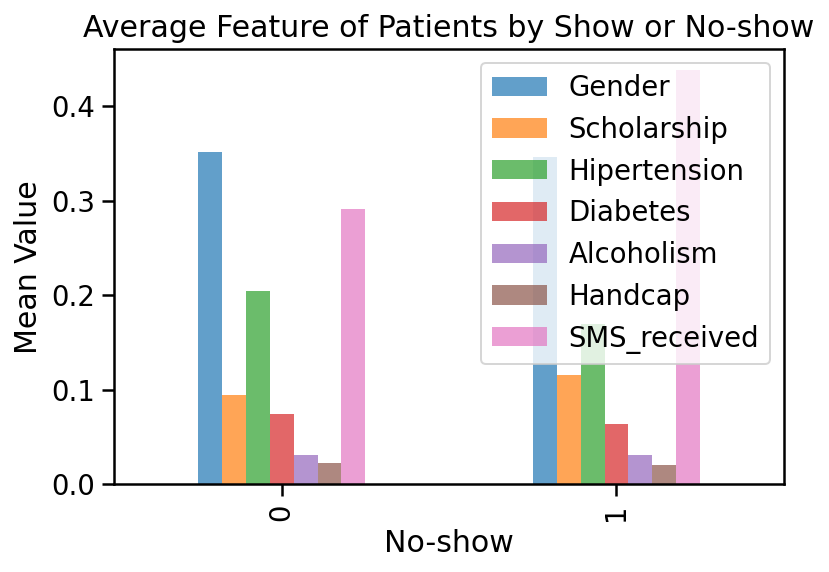

In [20]:
data1.groupby('No-show')[['Gender','Scholarship','Hipertension','Diabetes','Alcoholism','Handcap','SMS_received']].mean().plot(kind='bar', title='Average Feature of Patients by Show or No-show',ylabel='Mean Value', alpha=.7);

From the table and the figure above, we could find that there is slight difference in the basic features of patient showing or not showing to the appointment. To be specific, there is not much difference in the behavior of male or female, since both groups have a mean of around 0.35 regarding gender, which further suggests that female are the majortity of the sample. Patients who do not show up to the appointment generally have a younger age, 34.3 vs 37.8 on average, compared to patients showing up to the appointment. In general, patients not showing to the appointment are more likely to be those enrolled in Brasilian welfare program, and less likely to be of hipertension, diabetes, handicap. Patients who drink alcohol or not have similar likelihood to show up to the appointment. Moreover, those who receive the SMS are more likely to not show for the appointment. 

### Statistics Between No-show, Age and SMS_received

In this section, I conduct statistical analysis on the three important variables of No-show, Age and SMS_received, so as to understand the relationship between the three variables. 

In [35]:
sp.stats.pearsonr(data1['No-show'], data1['Age'])

(-0.060318511409173665, 1.315168466376606e-89)

In [36]:
sp.stats.pearsonr(data1['No-show'], data1['SMS_received'])

(0.12643065757314395, 0.0)

array([[<AxesSubplot:xlabel='No-show', ylabel='No-show'>,
        <AxesSubplot:xlabel='Age', ylabel='No-show'>,
        <AxesSubplot:xlabel='SMS_received', ylabel='No-show'>],
       [<AxesSubplot:xlabel='No-show', ylabel='Age'>,
        <AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='SMS_received', ylabel='Age'>],
       [<AxesSubplot:xlabel='No-show', ylabel='SMS_received'>,
        <AxesSubplot:xlabel='Age', ylabel='SMS_received'>,
        <AxesSubplot:xlabel='SMS_received', ylabel='SMS_received'>]],
      dtype=object)

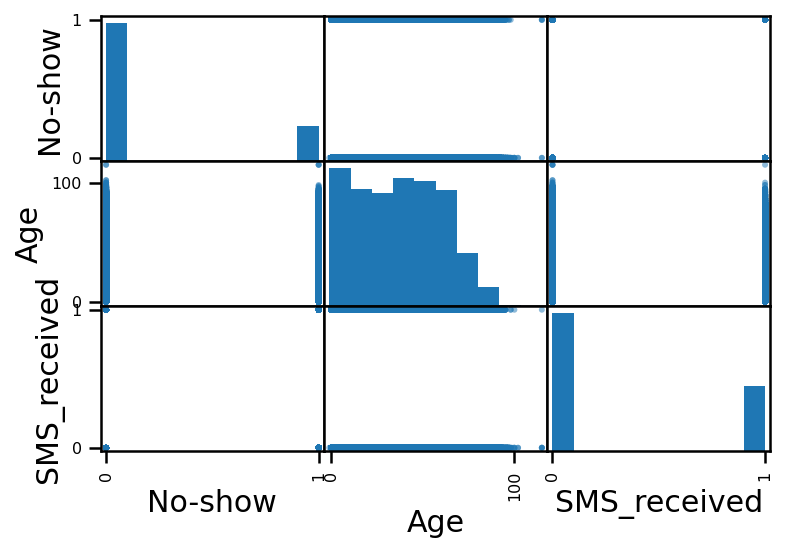

In [21]:
pd.plotting.scatter_matrix(data1[['No-show','Age','SMS_received']])

From the results of Pearson correlation, there is a significant negative relationship between No-show and Age, and a significant positive relationship between No-show and SMS_received, which corresponds to our findings in the previous section. 

<a id='conclusions'></a>
## Conclusions

The report has reached the following conclusions. First, patients showing or not showing to the medical appointment have much difference with respect to the basic features, with respect to age, scholarship, hipertension, diabetes, handicap and SMS_received. Second, there are significant correlation relationships between No-show and Age, and between No-show and SMS_received. 

### Limitations

The limitation of the analysis lies in the fact that the feature of neighbourhood has potential influnce on whether the patientn will show to the medical appointment since the distance between the neighbourhood and the hospital detemines the trouble of traffic, but the information is not available in the dataset. 
